In [ ]:
# CHEM E 465 HW7 Sebastian K
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# **1a)**

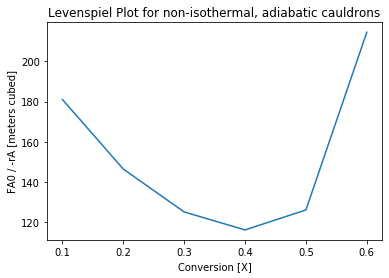

In [ ]:
# Given Information

Cp_A = 140; Cp_B = 100; Cp_C = 120; # cal / (mol K)
kf_30 = 1.8; # L/(mol hr)
Kc_30 = 25.0;
Hrxn_30 = -7.6 * 1000; # cal/mol
Ea = 25.3 * 1000; # cal/mol
T_in = 20.0 + 273.15; # K
T_30 = 30 + 273.15; # K
R = 1.9859; # cal/(mol K)
CA0 = 10; # mol/L
FA0 = 1000*CA0*1000; # mol / hr

X = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]);
T = T_in + (-Hrxn_30)*X/(Cp_A + Cp_B);
k_array = kf_30*np.exp(Ea/R * (1/T_30 - 1/T));
K_array = Kc_30*np.exp(Hrxn_30/R*(1/T_30 - 1/T));
rates = np.zeros(len(X));

for i in np.arange(0, len(X), 1):
  rates[i] = k_array[i] * CA0**2 * ((1 - X[i])**2 - (2*X[i])**2 / K_array[i]);

Y = FA0 / (rates*1000);
plt.figure();
plt.plot(X, Y); # converted back to meters cubed
plt.title("Levenspiel Plot for non-isothermal, adiabatic cauldrons");
plt.xlabel('Conversion [X]');
plt.ylabel('FA0 / -rA [meters cubed]');
plt.show(); 

#**1b)**

In [ ]:
CSTR = X[3] * FA0/(rates*1000)[3];
PFR = np.trapz([FA0/(rates*1000)[3], FA0/(rates*1000)[4], FA0/(rates*1000)[5]], [X[3], X[4], X[5]]);
totalvol = CSTR + PFR;
print(
      " CSTR volume:", round(CSTR,3), "meters cubed \n",
      "PFR volume:", round(PFR,3), "meters cubed \n", 
      "Total volume:", round(totalvol,3), "meters cubed");


 CSTR volume: 46.479 meters cubed 
 PFR volume: 29.146 meters cubed 
 Total volume: 75.626 meters cubed


#**1c)**

In [ ]:
# append a value for conversion of 0.0 to get proper integration of PFR
newX = np.arange(0, 0.7, 0.1);
newT = T_in + (-Hrxn_30)*newX/(Cp_A + Cp_B);
new_k_array = kf_30*np.exp(Ea/R * (1/T_30 - 1/newT));
new_K_array = Kc_30*np.exp(Hrxn_30/R*(1/T_30 - 1/newT));
new_rates = np.zeros(len(newX));

for i in np.arange(0, len(newX), 1):
  new_rates[i] = new_k_array[i] * CA0**2 * ((1 - newX[i])**2 - (2*newX[i])**2 / new_K_array[i]);

totalPFR = np.trapz(FA0/(new_rates*1000), newX);

print(" A single PFR would be", round(totalPFR - totalvol, 3), "meters cubed larger than \n",
      "the reactors in series.");

 A single PFR would be 16.243 meters cubed larger than 
 the reactors in series.


#**4a) and 4b)**

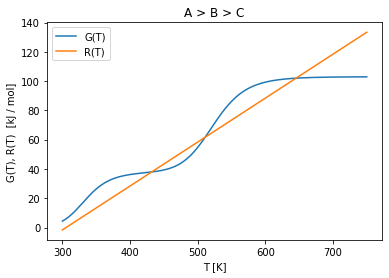

Concentrations at steady state # 1 are 
 CA: 0.005254 mol/L 
 CB: 0.292 mol/L 
 CC: 0.003 mol/L 
 Selectivity of B w/ respect to C is: 116.27 

Concentrations at steady state # 2 are 
 CA: 0.000606 mol/L 
 CB: 0.19 mol/L 
 CC: 0.109 mol/L 
 Selectivity of B w/ respect to C is: 1.74 

Concentrations at steady state # 3 are 
 CA: 5.3e-05 mol/L 
 CB: 0.005 mol/L 
 CC: 0.295 mol/L 
 Selectivity of B w/ respect to C is: 0.02 

Steady state 1 at operating temperature of 431 K maximizes formation of B


In [ ]:
Cp_A = 200; # J/(mol K)
Cp_B = Cp_A; Cp_C = Cp_A;
k1_300 = 1.3; # 1 / min
E1 = 11.9 * 4184; # J / mol
k2_500 = 3.5; # 1 / min
E2 = 23 * 4184; # J / mol
delH1A = -38 * 1000; # J / mol K
delH1B = -65 * 1000; # J / mol K
UA = 30.0 * 1000; # J / mol K
Ta = 57 + 273.15; # K
T0 = 20 + 273.15; # K
tau = 1 / 10; # min
CA0 = 0.3;
FA0 = 1000 * CA0;
R_cons = 8.314; # J / mol K

kappa = UA / (FA0 * Cp_A);
Tc = (T0 + kappa*Ta) / (1 + kappa);
T = np.arange(300, 751, 1);
k1 = k1_300*np.exp(E1/R_cons * (1/300 - 1/T));
k2 = k2_500*np.exp(E2/R_cons * (1/500 - 1/T));
G = -delH1A*tau*k1 / (1 + tau*k1) \
    - tau**2*k1 * k2*delH1B /  \
    ((1 + tau*k1)*(1 + tau*k2));
R = Cp_A*(1 + kappa)*(T-Tc);
plt.figure();
plt.plot(T, G / 1000, label='G(T)');
plt.plot(T, R / 1000, label='R(T)');
plt.title("A > B > C");
plt.xlabel('T [K]');
plt.ylabel('G(T), R(T)  [kJ / mol]')
plt.legend();
plt.show();

CA = CA0 / (1 + tau*k1);
CB = tau*k1*CA0 / ((1+tau*k1)*(1+tau*k2));
CC = CA0 - CA - CB;

# Effluent concentrations @ steady states
idx = np.argwhere(np.diff(np.sign(R - G))).flatten(); # from stackoverflow

for i in [0, 1, 2]:
  print("Concentrations at steady state #", i + 1, "are \n",
        "CA:", round(CA[idx[i]], 6), "mol/L \n",
        "CB:", round(CB[idx[i]], 3), "mol/L \n"
        " CC:", round(CC[idx[i]], 3), "mol/L \n",
        "Selectivity of B w/ respect to C is:", round(CB[idx[i]]/CC[idx[i]], 2), "\n");
  
print("Steady state 1 at operating temperature of", T[idx[0]], "K maximizes formation of B");